<a href="https://colab.research.google.com/github/injoon-pij/dlnlp-learning/blob/main/dlnlp_deep_learning_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Perceptron

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_ann.ipynb

위 링크의 __2) Perceptron__ 참고

# 2) ANN (Artificial Neural Network)

* 인공 신경망의 특징에 따른 분류

 * 피드 포워드 신경망 (Feed-Forward Neural Network, FFNN)
   
   * 입력층에서 출력층 방향으로 연산이 전개되는 신경망

 * 순환 신경망 (Recurrent Neural Network)

   * 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용되는 신경망

[순방향 신경망]


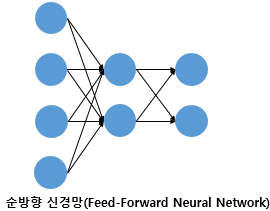

[순환 신경망]

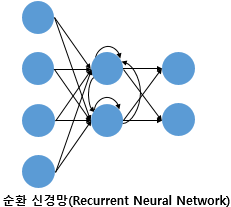

 * cf.) 전결합층 (Fully - connected layer, FC, Dense layer)
  * 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 경우
  * 전결합층만으로 구성된 피드 포워드 신경망이 있다면, 이를 전결합 피드 포워드 신경망(Fully-connected FFNN)이라고도 함

---
https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_ann.ipynb

이 외에 활성화함수에 관련된 내용은 위 링크의 __2.1 Activation Function__ 참고

# 3) Train

## 3.1 Forward Propagation

* 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정

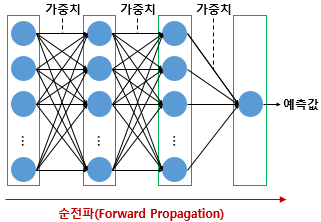

## 3.2 Loss Function

* 실제값과 예측값의 차이를 수치화해주는 함수
* 오차가 클 수록 손실 함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 작아짐
* 손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 W와 편향 b를 찾아가는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요함
* 회귀 문제에서는 평균제곱오차(Mean Squared Error, MSE), 분류 문제에서는 크로스 엔트로피(Cross-Entropy)를 주로 손실 함수로 사용함


## 3.3 Optimizer

https://keras.io/optimizers/

케라스의 옵티마이저 사용법은 위 링크에 자세히 나와있음

---

* 배치 경사 하강법(Batch Gradient Descent)
 * 오차를 구할 때 전체 데이터를 고려
 * 즉 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행
 * 전체 데이터를 고려해서 학습하므로 에포크당 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점이 있으나 글로벌 미니멈을 찾을 수 있다는 장점이 있음
 * ```model.fit(X_train, y_train, batch_size=len(train_X))```

* 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
 * 배치 경사 하강법과 달리 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법
 * 더 적은 데이터를 사용하므로 더 빠르게 계산할 수 있음
 * 매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있음
 * ```model.fit(X_train, y_train, batch_size=1)```

* 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
 * 정해진 양에 대해서만 계산하여 매개 변수의 값을 조정하는 경사 하강법
 * 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적이라는 장점이 있음 (실제로 가장 많이 사용됨)
 * ```model.fit(X_train, y_train, batch_size=32) #32를 배치 크기로 하였을 경우```

* 모멘텀(Momentum)
 * 경사 하강법에 관성을 더해주는 방법
 * 모멘텀은 경사 하강법에서 계산된 접선의 기울기에 한 시점(step) 전의 접선의 기울기값을 일정한 비율만큼 반영함
 * 이를 통해 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있음
 * 즉 로컬 미니멈에 도달하였을 때, 이를 글로벌 미니멈으로 잘못 인식하여 계산이 끝나버리는 상황을 막는 효과를 가짐
 * ```keras.optimizers.SGD(lr = 0.01, momentum= 0.9)```

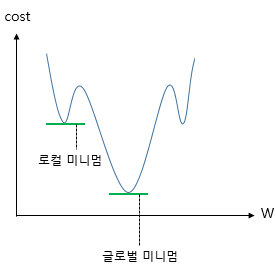

* 아다그라드(Adagrad)
 * 매개변수들은 각자 의미하는 바가 다르기 때문에, 모든 매개변수에 동일한 학습률을 적용하는 것은 비효율적임
 * 이를 근거로 각 매개변수에 서로 다른 학습률을 적용시키는 방법
 * 변화가 많은 매개변수는 학습률을 작게, 변화가 적은 매개변수는 학습률을 크게 설정함
 * ```keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)```

* 알엠에스프롭(RMSprop)
 * 아다그라드로 학습을 계속 진행한 경우, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있음
 * 이를 다른 수식으로 대체하여 이러한 단점을 개선한 방법
 * ```keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)```

* 아담(Adam)
 * 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법
 * ```keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)```

## 3.4 BackPropagation

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_ann.ipynb
위 링크의 __3) Backpropagation__ 참고

## 3.5 Epochs, Batch size and Iteration

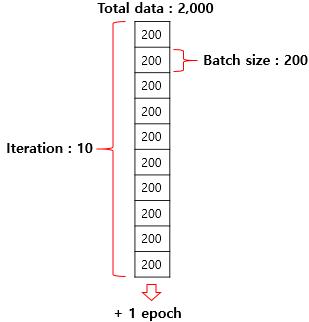

* 에포크(Epoch)
 * 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태를 말함
 * 만약 에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습한 것임 
 * 에포크 횟수가 지나치거나 너무 적으면 과적합과 과소적합이 발생할 수 있음

* 배치 크기(Batch size)
 * 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말함
 * 만약 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트하는 것임
 * 배치 크기와 배치의 수는 다른 개념임
   * 전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10
   * 이때 배치의 수를 이터레이션이라고 함

* 이터레이션(Iteration)
 * 한 번의 에포크를 끝내기 위해서 필요한 배치의 수, 또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수를 말함
 * 만약 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10회임
 * 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미
 * SGD는 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행한다고 볼 수 있음

# 4) Overfitting / Gradient Vanishing and Exploding

https://github.com/injoon-pij/pytorch-learning/blob/master/pytorch_ann.ipynb

위 링크의 __6) Some techniques for Neural Network Model__ 참고
